# 利用 AWS Sagemaker BlazingText 对不均衡文本进行多分类

## 生成不均衡文本数据集

原始数据集：DBpedia中均衡数据集，一个14个label，每个label都是4W条数据

新的数据集：利用随机采样生成不均衡数据集，一共14个label，数量从4W到20

In [50]:
# 下载数据集

!wget https://github.com/saurabh3949/Text-Classification-Datasets/raw/master/dbpedia_csv.tar.gz

--2020-08-14 10:31:52--  https://github.com/saurabh3949/Text-Classification-Datasets/raw/master/dbpedia_csv.tar.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/saurabh3949/Text-Classification-Datasets/master/dbpedia_csv.tar.gz [following]
--2020-08-14 10:31:52--  https://raw.githubusercontent.com/saurabh3949/Text-Classification-Datasets/master/dbpedia_csv.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.108.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68431223 (65M) [application/octet-stream]
Saving to: ‘dbpedia_csv.tar.gz’

dbpedia_csv.tar.gz  100%[===================>]  65.26M   214MB/s    in 0.3s    

2020-08-14 10:31:56 (214 MB/s) - ‘dbpedia_csv.tar.gz’ saved [68431223

In [51]:
!tar -xzvf dbpedia_csv.tar.gz

dbpedia_csv/
dbpedia_csv/test.csv
dbpedia_csv/classes.txt
dbpedia_csv/train.csv
dbpedia_csv/readme.txt


In [1]:
import pandas as pd

origin_df = pd.read_csv('dbpedia_csv/train.csv')
print("行数：" + str(origin_df.shape[0]))
origin_df.head(5)

行数：560000


label                              title  \
0      1                   E. D. Abbott Ltd   
1      1                     Schwan-Stabilo   
2      1                         Q-workshop   
3      1  Marvell Software Solutions Israel   
4      1        Bergan Mercy Medical Center   

                                            abstract  
0   Abbott of Farnham E D Abbott Limited was a Br...  
1   Schwan-STABILO is a German maker of pens for ...  
2   Q-workshop is a Polish company located in Poz...  
3   Marvell Software Solutions Israel known as RA...  
4   Bergan Mercy Medical Center is a hospital loc...

In [2]:
count_classes = pd.value_counts(origin_df['label'], sort = True)
print(count_classes)

14    40000
13    40000
12    40000
11    40000
10    40000
9     40000
8     40000
7     40000
6     40000
5     40000
4     40000
3     40000
2     40000
1     40000
Name: label, dtype: int64


In [45]:
grouped = origin_df.groupby('label')
new_df = grouped.get_group(1)

In [46]:
# 对每个label随机取样

group2 = grouped.get_group(2)
new_group2 = group2.sample(n=38000)

group3 = grouped.get_group(3)
new_group3 = group3.sample(n=18000)

group4 = grouped.get_group(4)
new_group4 = group4.sample(n=17000)

group5 = grouped.get_group(5)
new_group5 = group5.sample(n=16000)

group6 = grouped.get_group(6)
new_group6 = group6.sample(n=15000)

group7 = grouped.get_group(7)
new_group7 = group7.sample(n=14000)

group8 = grouped.get_group(8)
new_group8 = group8.sample(n=13000)

group9 = grouped.get_group(9)
new_group9 = group9.sample(n=8000)

group10 = grouped.get_group(10)
new_group10 = group10.sample(n=5000)

group11 = grouped.get_group(11)
new_group11 = group11.sample(n=3000)

group12 = grouped.get_group(12)
new_group12 = group12.sample(n=900)

group13 = grouped.get_group(13)
new_group13 = group13.sample(n=100)

group14 = grouped.get_group(14)
new_group14 = group14.sample(n=20)

In [47]:
new_df = new_df.append(new_group2)
new_df = new_df.append(new_group3)
new_df = new_df.append(new_group4)
new_df = new_df.append(new_group5)
new_df = new_df.append(new_group6)
new_df = new_df.append(new_group7)
new_df = new_df.append(new_group8)
new_df = new_df.append(new_group9)
new_df = new_df.append(new_group10)
new_df = new_df.append(new_group11)
new_df = new_df.append(new_group12)
new_df = new_df.append(new_group13)
new_df = new_df.append(new_group14)


print("行数：" + str(new_df.shape[0]))

new_count_classes = pd.value_counts(new_df['label'], sort = True)
print(new_count_classes)

行数：188020
1     40000
2     38000
3     18000
4     17000
5     16000
6     15000
7     14000
8     13000
9      8000
10     5000
11     3000
12      900
13      100
14       20
Name: label, dtype: int64


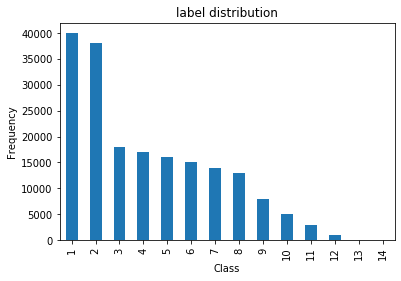

In [48]:
import matplotlib.pyplot as plt

count_classes = new_df.label.value_counts()
count_classes.plot(kind = 'bar')
plt.title("label distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [49]:
new_df.to_csv("original_dataset/dataset.csv", index=0)

In [52]:
from shutil import copyfile

copyfile("dbpedia_csv/classes.txt", "original_dataset/classes.txt")

'original_dataset/classes.txt'